## Importing the Libraries

In [35]:
# For numerical operations, data manipulation and analysis
import numpy as np              
import pandas as pd

# For plotting the data             
import matplotlib.pyplot as plt 

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For calculating MSE and R-squared values
from sklearn.metrics import r2_score ,mean_squared_error

import random


## [ I ] Load and Explore the Dataset

In [36]:
### Load the data
df = pd.read_csv("Advertising.csv", index_col = 0)

# For visualization of data
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## [ II ] Standardized the data set
 

In [37]:
# Standardize each column of the data
standardized_data = (df - df.mean()) / df.std()

# Check if the data is standardized
standardized_data.head()

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143


## [ III ] Add bias

In [38]:
# Add bias
standardized_data.insert(0,'bias', 1)

In [39]:
# Check Values
standardized_data

,bias,TV,Radio,Newspaper,Sales
1,1,0.967425,0.979066,1.774493,1.548168
2,1,-1.194379,1.080097,0.667903,-0.694304
3,1,-1.512360,1.524637,1.779084,-0.905135
4,1,0.051919,1.214806,1.283185,0.858177
5,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287,-1.230964
197,1,-0.615491,-1.236899,-1.031011,-0.828469
198,1,0.348934,-0.940539,-1.109069,-0.234310
199,1,1.590574,1.261955,1.636743,2.199827


## [ IV ] Dividing the dataset into training and testing

Training: 85%    ,  Testing: 15%

In [40]:
x = standardized_data.drop("Sales", axis = 1)
y = standardized_data["Sales"]

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [42]:
# Dataset for training
print ("Predictors:")
print (x_train)
print ("Sales:")
print (y_train)

Predictors:
     bias        TV     Radio  Newspaper
10      1  0.614501 -1.391814  -0.429504
19      1 -0.906682 -0.186168  -0.562662
56      1  0.604018  1.760378   1.352060
76      1 -1.515854  1.376457   2.702008
151     1  1.556796 -0.630708   0.295978
..    ...       ...       ...        ...
107     1 -1.421508 -0.826036  -0.039213
15      1  0.664586  0.649028   0.709228
93      1  0.822994  0.689441   1.306143
180     1  0.216151 -0.893391  -0.594804
103     1  1.550972 -0.886655  -0.420320

[170 rows x 4 columns]
Sales:
10    -0.655971
19    -0.521806
56     1.854831
76    -1.020133
151    0.398183
         ...   
107   -1.307629
15     0.954009
93     1.030675
180   -0.272642
103    0.149019
Name: Sales, Length: 170, dtype: float64


## [ V ] Functions to Use (for fitting the model)

Initial weights

In [43]:
def initialize_weights():
    random.seed(42)
    theta_0 = random.uniform(0,1)
    theta_1 = random.uniform(0,1)
    theta_2 = random.uniform(0,1)
    theta_3 = random.uniform(0,1)
    
    return np.array([theta_0,theta_1,theta_2,theta_3])

In [44]:
#Checking the function
initialize_weights()

array([0.6394268 , 0.02501076, 0.27502932, 0.22321074])

Vector for predicted values of y

In [45]:
def predict(x, weights):
    return np.dot(x, weights)

Function compute_cost $$ \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 $$

In [46]:
def compute_cost(y_pred, y):
    # Variable for error and m
    error = (y_pred - y)
    m = len(y)
    
    # Solve for cost
    return np.sum(error**2)/(2*m)

Function compute_gradient $$ \alpha\frac{1}{m}\sum_{i=1}^{m}((\hat{y}^{(i)}) - y^{(i)})x_j^{(i)} $$

In [47]:
def compute_gradient(y_pred, y, x):
    # Variable for error
    error = (y_pred - y)
    m = len(y)

    # Partial derivative
    return np.dot(x.T, error) / m

Function update_weights $$ \theta_j := \theta_j - awx_j^{(i)} $$

In [48]:
def update_weights(weights, gradient, lrate):
    return weights - (lrate*gradient)

Function grad_descent 

In [49]:
def grad_descent(x, y , iterations, lrate):
    # Initialize weights
    weights = initialize_weights()

    # Cost and weights matrix
    costs_matrix = []
    weights_matrix = []

    for i in range(iterations):
        # Predicted sales
        y_pred = predict(x, weights)

        # Cost
        cost = compute_cost(y_pred, y)

        # Compute the gradient
        gradient = compute_gradient(y_pred, y, x)

        # Update the weights
        weights = update_weights(weights, gradient, lrate)

        # Concatenate to the matrices
        costs_matrix.append(cost)
        weights_matrix.append(weights)
        
    return costs_matrix, weights_matrix    

Function plot_costs

In [50]:
def plot_costs(cost):
    costs = pd.DataFrame(cost, columns = ['Costs'])

    # Plot dimensions and labels
    fig, ax = plt.subplots(figsize=(13, 7))
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    # Plotting the data
    ax.plot(costs.index, costs['Costs'], label='Costs', marker='o', color='red')

    # Show plot
    plt.show()
    

## [ VI ]Predicting y using TRAINING data and its costs

Train Model

In [51]:
costs_train, weights_train = grad_descent(x_train, y_train, 5000, 0.001)

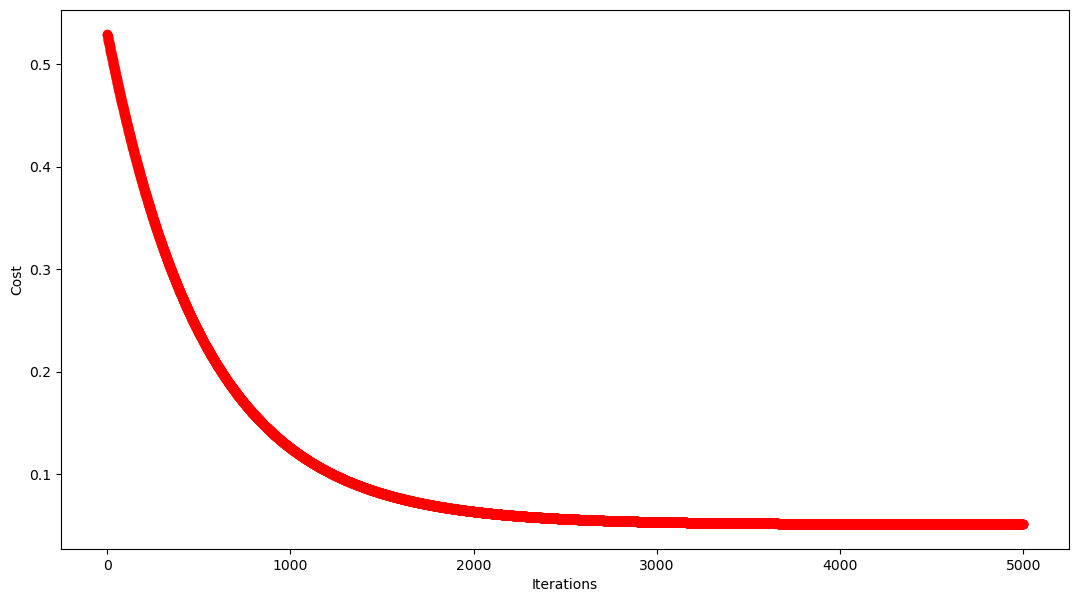

In [52]:
plot_costs(costs_train)

In [53]:
# look at the final costs
costs_train[-10:]

[0.051202000057838495,
 0.0512018342231698,
 0.05120166862623004,
 0.05120150326665697,
 0.05120133814408903,
 0.051201173258165145,
 0.05120100860852493,
 0.05120084419480847,
 0.05120068001665653,
 0.051200516073710386]

Predicted sales for training data

In [54]:
y_pred_training = predict(x_train,weights_train[-1])
y_pred_training

array([-0.28282328, -0.76503163,  1.39551965, -0.33454856,  0.8188765 ,
        1.15359475, -0.01329177,  1.30760966, -0.57114883, -1.78726664,
       -0.81521405, -0.25168265, -0.75504462, -1.10333965, -0.08799076,
       -1.62715062, -0.89474096,  0.0216003 , -0.9743246 , -0.458655  ,
        0.25479198, -0.39782656, -0.23171451, -0.61221945, -1.40335436,
       -0.76535063, -0.85727192,  1.91143462, -1.20298511, -0.28167711,
        0.70892823,  0.2417652 , -0.48636523, -0.59833394,  0.53515806,
       -1.34560633,  1.38958861, -1.48869199, -0.7690581 , -0.48919145,
       -0.89618802, -1.40363745,  0.17181025,  0.62615864,  0.34431817,
        0.42933489,  0.17006727,  1.03609592, -0.00771508,  1.32830176,
       -0.26984661, -0.04792313, -0.95172542,  0.56406468, -1.06410615,
        0.25463811, -0.0588939 ,  1.73409658, -0.29914502,  1.68623822,
       -1.38068411,  0.86806767,  1.79506435,  0.8773305 ,  0.58786547,
        0.44576525, -0.29385851, -0.42554315,  0.56085995,  0.09

Cost (train)

In [55]:
compute_cost(y_pred_training,y_train)

0.051200352365611934

Check MSE (train)

In [56]:
mean_squared_error(y_train, y_pred_training)

0.10240070473122387

## [ VII ]Predict y using TESTING data and its cost

Test Model

In [57]:
costs_test, weights_test = grad_descent(x_test, y_test, 5000, 0.001)

In [58]:
y_pred_testing = predict(x_test,weights_test[-1])
y_pred_testing

array([ 0.43147557,  1.30780554,  1.6135501 , -0.86378109,  1.69613083,
       -0.31949848,  1.43713931, -1.31328231,  0.11174239,  0.27341663,
       -1.01181119, -1.47951067,  0.09020484, -1.09898611, -0.77732006,
       -0.29332444, -1.20570023,  0.55705174, -0.78901161,  1.10178601,
        1.06666762, -0.4562427 , -0.42084296,  1.42743628, -1.17155827,
       -1.61848773,  1.36034381, -0.31589371, -0.95429153, -1.14895613])

Cost (test)

In [59]:
compute_cost(y_pred_testing,y_test)

0.04557134683524103

Check MSE (test)

In [60]:
mean_squared_error(y_test, y_pred_testing)

0.09114269367048206

## [ VIII ]De-standardize both test and training data

In [61]:
destan_data = pd.DataFrame()

In [62]:
# Standardize each column of the data
# Standard deviations
std_tv = df.TV.std()
std_radio = df.Radio.std()
std_news = df.Newspaper.std()
std_sales = df.Sales.std()
# Means
mean_tv = df.TV.mean()
mean_radio = df.Radio.mean()
mean_news = df.Newspaper.mean()
mean_sales = df.Sales.mean()

# One by one de-standardization to not edit bias
destan_data['TV'] = standardized_data.TV.apply(lambda x: (x*std_tv+mean_tv))
destan_data['Radio'] = standardized_data.Radio.apply(lambda x: (x*std_radio+mean_radio))
destan_data['Newspaper'] = standardized_data.Newspaper.apply(lambda x: (x*std_news+mean_news))
destan_data['Sales'] = standardized_data.Sales.apply(lambda x: (x*std_sales+mean_sales))



# Check if the data is standardized
destan_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## [ IX ] Observe and Analyse

In [63]:
destan_x = destan_data.drop("Sales", axis=1)
destan_y = destan_data.Sales

In [64]:
desx_train, desx_test, desy_train, desy_test = train_test_split(x, y, train_size=0.85, test_size=0.15, random_state = 42)

In [66]:
destantrain_cost , destantrain_weight = grad_descent(desx_train, desy_train, 5000, 0.001)

In [67]:
destantrain_ypred = predict(desx_train, destantrain_weight[-1])
destantrain_ypred

array([-0.28282328, -0.76503163,  1.39551965, -0.33454856,  0.8188765 ,
        1.15359475, -0.01329177,  1.30760966, -0.57114883, -1.78726664,
       -0.81521405, -0.25168265, -0.75504462, -1.10333965, -0.08799076,
       -1.62715062, -0.89474096,  0.0216003 , -0.9743246 , -0.458655  ,
        0.25479198, -0.39782656, -0.23171451, -0.61221945, -1.40335436,
       -0.76535063, -0.85727192,  1.91143462, -1.20298511, -0.28167711,
        0.70892823,  0.2417652 , -0.48636523, -0.59833394,  0.53515806,
       -1.34560633,  1.38958861, -1.48869199, -0.7690581 , -0.48919145,
       -0.89618802, -1.40363745,  0.17181025,  0.62615864,  0.34431817,
        0.42933489,  0.17006727,  1.03609592, -0.00771508,  1.32830176,
       -0.26984661, -0.04792313, -0.95172542,  0.56406468, -1.06410615,
        0.25463811, -0.0588939 ,  1.73409658, -0.29914502,  1.68623822,
       -1.38068411,  0.86806767,  1.79506435,  0.8773305 ,  0.58786547,
        0.44576525, -0.29385851, -0.42554315,  0.56085995,  0.09

Cost (destandardized train)

In [68]:
compute_cost(destantrain_ypred , desy_train)

0.051200352365611934

Check MSE (destandardized train)

In [69]:
mean_squared_error(desy_train, destantrain_ypred)

0.10240070473122387

The resulting cost and MSE of the standardized and destandardized/original dataset are similar. We can assume that even if the dataset was not normalized, it will produce the same results